In [4]:
!ls /workdir

Data-Guillermo				 MTDA-ITA
Data-Guillermo-20240916T235926Z-003.zip  Notebooks
Data-Guillermo-20240916T235926Z-004.zip


In [9]:
!export DEBIAN_FRONTEND=noninteractive
!apt-get update -y
!apt-get install git-all -y
#!pip install seqeval==0.0.5
#!pip install keras==2.0.8
#!pip install scipy
#!pip install scikit-learn
#!pip install tensorflow==1.15

#!pip install git+https://www.github.com/keras-team/keras-contrib.git

Get:1 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  InRelease
Ign:1 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  InRelease
Get:2 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  Release [574 B]
Get:2 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  Release [574 B]    
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1581 B]
Err:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY A4B469963BF863CC
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease         
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease       
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86

In [26]:
#!pip install --upgrade pip setuptools
#!pip install keras==2.0.9
!pip install einops

In [10]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-fe1knxg0
  Running command git clone --filter=blob:none -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-fe1knxg0
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101267 sha256=731f665a220b9c3e689796ea23df5044d0feee016383976e8de0fe3544c48df2
  Stored in directory: /tmp/pip-ephem-wheel-cache-1d01m8qo/wheels/16/87/6e/8e3b73f23fb38163af1c319aa23f14602018b501ecb91430a2
Successfully built keras-contrib


In [1]:
import tensorflow as tf
tf.__version__
import keras
keras.__version__

Using TensorFlow backend.


'2.0.9'

In [11]:
import os
#tf.compat.v1.disable_v2_behavior()
import tensorflow as tf
import keras
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
#import tensorflow_hub as hub
#domain [MT2PA,PA2MT]
#version [run_0,run_1,run_2,run_3,run_4]
#component [classifer  dec_sh  dis  enc_ex  enc_sh]
root="/workdir/Data-Guillermo"
models_root=root+"/DADL-MT2PA/models/run_0"
def load_model(domain="MT2PA",version="run_0",component="classifer"):
  os.path.join(root,"DADL-"+domain,"models",version,component+".h5")
  return keras.models.load_model(os.path.join(root,"DADL-"+domain,"models",version,component+".h5"),compile=False,
                                                     custom_objects={'InstanceNormalization':tf.keras.layers.GroupNormalization}
)

def load_model(domain="MT2PA",version="run_0",component="classifer"):
  os.path.join(root,"DADL-"+domain,"models",version,component+".h5")
  return keras.models.load_model(os.path.join(root,"DADL-"+domain,"models",version,component+".h5"),#compile=False,
                                    #custom_objects={'InstanceNormalization':(lambda **args: tf.keras.layers.GroupNormalization(groups=1,axis=-1,center=True, scale=True))}
                                    custom_objects={'InstanceNormalization':InstanceNormalization,
                                                    
                                                   }
                                    
                                    #custom_objects={'InstanceNormalization':tf.keras.layers.GroupNormalization(axis=2,groups=-1)}
                                    #custom_objects={'InstanceNormalization':tf.keras.layers.GroupNormalization}
)

def load_model_(domain="MT2PA",version="run_0",component="classifer"):
  return os.path.join(root,"DADL-"+domain,"models",version,component+".h5")

In [72]:
model=load_model(domain="MT2PA",version="run_0",component="enc_sh")
model.summary()
model_dec=load_model(domain="MT2PA",version="run_0",component="dec_sh")

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enc_sh_input_enc_net (InputLaye (None, 128, 128, 20) 0                                            
__________________________________________________________________________________________________
enc_sh_conv_net_0 (Conv2D)      (None, 128, 128, 16) 15696       enc_sh_input_enc_net[0][0]       
__________________________________________________________________________________________________
enc_sh_isnt_norm_net_0 (Instanc (None, 128, 128, 16) 2           enc_sh_conv_net_0[0][0]          
__________________________________________________________________________________________________
enc_sh_relu_net_0 (Activation)  (None, 128, 128, 16) 0           enc_sh_isnt_norm_net_0[0][0]     
__________________________________________________________________________________________________
enc_sh_con

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


TypeError: ('Keyword argument not understood:', 'interpolation')

# DADOS

In [12]:
!ls /workdir/Data-Guillermo/dataset/MA

MA_1C_RGB_img_filt_norm_2020_2021_10B-001.npy  test_mask_MA.npy
MA_1C_ref_2020_2021.npy


In [3]:
#root="/workdir/Data-Guillermo"
root="/workdir/Data-Guillermo/dataset"
import numpy as np
import os
def load_dataset(dataset="MA",data="MA_1C_RGB_img_filt_norm_2020_2021_10B-001.npy",mask="test_mask_MA.npy"):
  return (np.load(os.path.join(root,dataset,data)),np.load(os.path.join(root,dataset,data)))

In [ ]:
dtp=load_dataset()

In [27]:
import numpy as np
from einops import rearrange
import matplotlib.pyplot as plt

In [73]:
x_d1=np.random.uniform(0,1,(1,128,128,20))
x_d2=np.random.uniform(0,1,(1,128,128,20))
z1_sh=model.predict(x_d1)
z2_sh=model.predict(x_d2)

In [93]:
xv=np.random.normal(0,1,(4,1))
xv

array([[-0.03439812],
       [-1.07462874],
       [-0.15031252],
       [ 1.92098424]])

In [92]:
np.matmul(xv,xv.T)
#xv.T

class MMD(object):
    def __init__(self,kernel,kernel_trick=False):
        """
        kernel: function of x and y to scalar value
        kernel_trick: function with x,y input and xx,xy,yy output
        """
        self.kernel_trick=kernel_trick
        self.kernel=kernel
    def compute(self,x,y):
        """
        x: vector [Data points,data dimension]
        y: vector [Data points,data dimension]
        """
        if kernel_trick:
            xx,xy,yy=kernel_trick(x,y)
        else:
            xx=np.array(list(map(lambda x,y: self.kernel(x,y),x,x)))
            xy=np.array(list(map(lambda x,y: self.kernel(x,y),x,y)))
            yy=np.array(list(map(lambda x,y: self.kernel(x,y),x,x)))
        
        return np.mean(xx-2*xy+yy)

array([[ 0.97904833, -0.37261957,  1.01929848, -0.453713  ],
       [-0.37261957,  0.14181664, -0.38793853,  0.17268029],
       [ 1.01929848, -0.38793853,  1.06120337, -0.47236582],
       [-0.453713  ,  0.17268029, -0.47236582,  0.2102608 ]])

In [105]:
f=(lambda x:(2*x,x**2))
if f:
    print(f(2))

(4, 4)


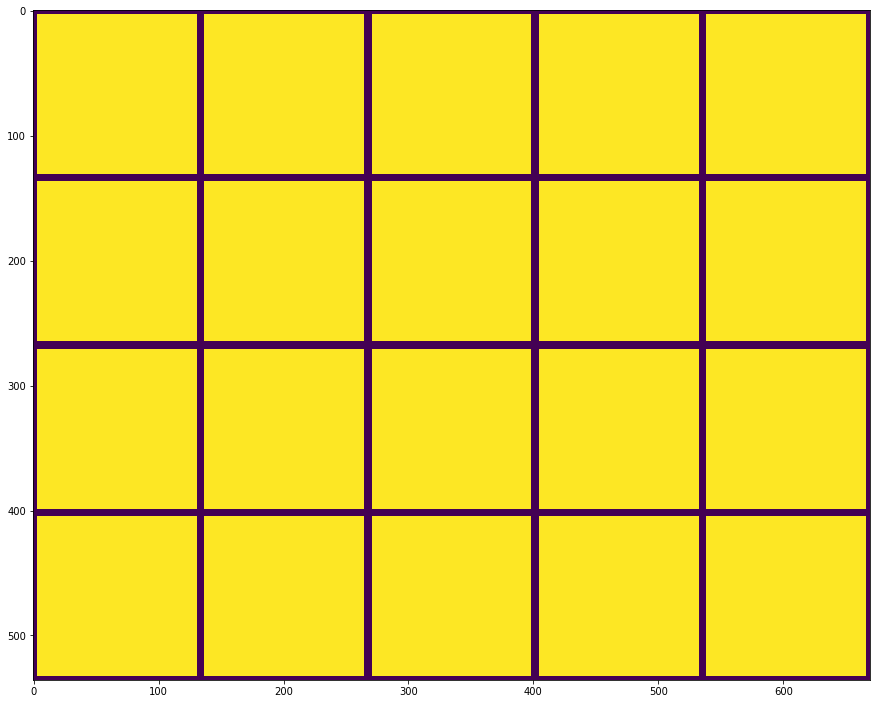

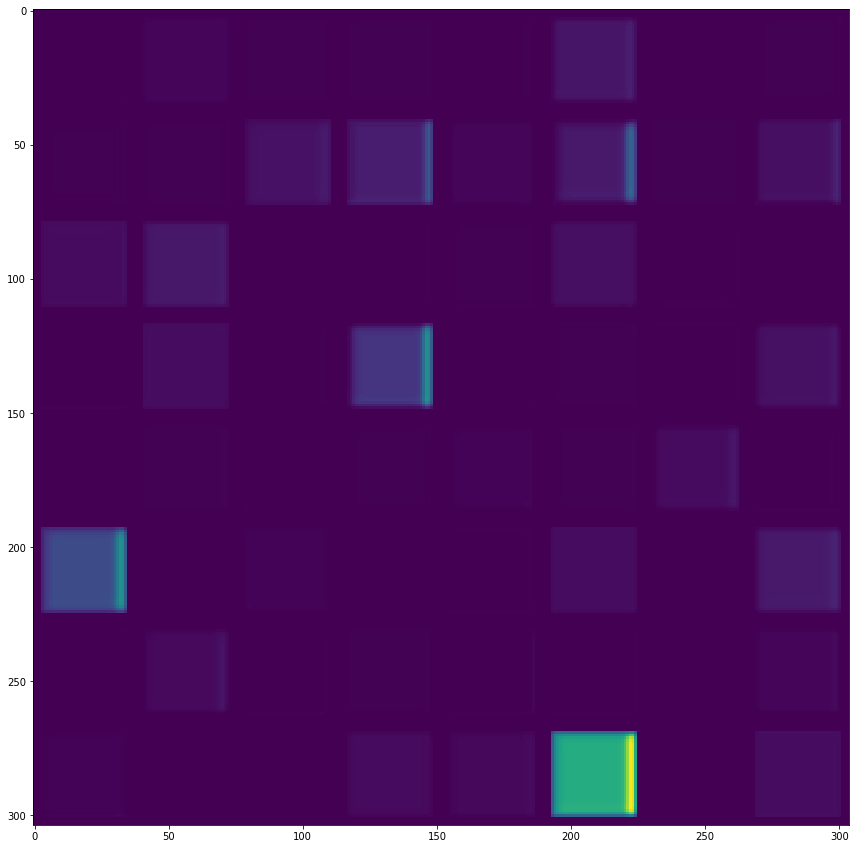

In [84]:
x=np.random.normal(0,5,(1,128,128,20))
#x=np.ones((1,128,128,20))
z_sh=model.predict(x)

plt.figure(figsize=(15,15))
plt.imshow(
    rearrange(
        np.pad(x[0], ((3,3),(3,3),(0,0)), 'constant', constant_values=(0,0)),
        #x[0] ,
        'b c (d1 d2) -> (d1 b) (d2 c)',d1=4,d2=5
    )
)

plt.figure(figsize=(15,15))
plt.imshow(
    rearrange(
        np.pad(z_sh[0], ((3,3),(3,3),(0,0)), 'constant', constant_values=(0,0)),
        #z_sh[0] ,
        'b c (d1 d2) -> (d1 b) (d2 c)',d1=8,d2=8))